In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV

from src.exception import CustomException
from src.logger import logging
import sys

In [151]:
df = pd.read_csv('finalTrain.csv')

In [152]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [153]:
df.shape

(45584, 20)

In [154]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [156]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [157]:
for column in df.columns[2:]:
    print(f'no. of unique values in {column} : {df[column].nunique()} \n')

    if df[column].nunique() < 8:
        print(df[column].unique())

    print("---------------------------------------------")


no. of unique values in Delivery_person_Age : 22 

---------------------------------------------
no. of unique values in Delivery_person_Ratings : 28 

---------------------------------------------
no. of unique values in Restaurant_latitude : 657 

---------------------------------------------
no. of unique values in Restaurant_longitude : 518 

---------------------------------------------
no. of unique values in Delivery_location_latitude : 4373 

---------------------------------------------
no. of unique values in Delivery_location_longitude : 4373 

---------------------------------------------
no. of unique values in Order_Date : 44 

---------------------------------------------
no. of unique values in Time_Orderd : 176 

---------------------------------------------
no. of unique values in Time_Order_picked : 193 

---------------------------------------------
no. of unique values in Weather_conditions : 6 

['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny' nan]
----------

In [158]:
feature = []
missing_value = []
missing_percentage = []
dtype = []
count = []
unique = []

for column in df.columns[2:]:
    feature.append(column)
    missing_value.append(df[column].isnull().sum())
    missing_percentage.append(((df[column].isnull().sum())/df.shape[0])*100)
    dtype.append(df[column].dtype)
    count.append(df[column].count())
    unique.append(df[column].nunique())

new_df = pd.DataFrame({
    'feature' : feature,
    'count' : count,
    'missing' : missing_value,
    'nunique' : unique,
    'missing_percentage' : missing_percentage,
    'dtype' : dtype
})

In [159]:
new_df

,feature,count,missing,nunique,missing_percentage,dtype
0,Delivery_person_Age,43730,1854,22,4.067217,float64
1,Delivery_person_Ratings,43676,1908,28,4.185679,float64
2,Restaurant_latitude,45584,0,657,0.000000,float64
3,Restaurant_longitude,45584,0,518,0.000000,float64
4,Delivery_location_latitude,45584,0,4373,0.000000,float64
5,Delivery_location_longitude,45584,0,4373,0.000000,float64
6,Order_Date,45584,0,44,0.000000,object
7,Time_Orderd,43853,1731,176,3.797385,object
8,Time_Order_picked,45584,0,193,0.000000,object
9,Weather_conditions,44968,616,6,1.351351,object


In [160]:
df.drop('ID', axis=1, inplace=True)

In [161]:
df['Order_Date']

0        12-02-2022
1        13-02-2022
2        04-03-2022
3        13-02-2022
4        14-02-2022
            ...    
45579    24-03-2022
45580    16-02-2022
45581    11-03-2022
45582    07-03-2022
45583    02-03-2022
Name: Order_Date, Length: 45584, dtype: object

In [162]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")

In [163]:
df['Order_Date']

0       2022-02-12
1       2022-02-13
2       2022-03-04
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-03-11
45582   2022-03-07
45583   2022-03-02
Name: Order_Date, Length: 45584, dtype: datetime64[ns]

In [164]:
df['year'] = df['Order_Date'].dt.year
df['month'] = df['Order_Date'].dt.month
df['date'] = df['Order_Date'].dt.day

In [165]:
df.drop('Order_Date', axis=1, inplace=True)

In [166]:
df.dropna(subset=['Time_Orderd'], inplace=True)

In [167]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.',':')

In [168]:
def extract_time(x):
    try : 
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

In [169]:
df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [170]:
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='ignore')

/var/folders/sz/yhwhpqt538b58w4504fnch580000gn/T/ipykernel_22151/1260158902.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S', errors='ignore')


In [171]:
df['OrderTime_Hour'] = df['Time_Orderd'].str.split(':', expand=True)[0]

df['OrderTime_Hour'] = df['OrderTime_Hour'].replace('0', '00')

df['OrderTime_Hour'] = df['OrderTime_Hour'].astype('int32')

In [172]:
df['OrderTime_Min'] = df['Time_Orderd'].str.split(':', expand=True)[1]

df['OrderTime_Min'] = df['OrderTime_Min'].replace('0', '00')

df['OrderTime_Min'] = df['OrderTime_Min'].astype('int32')

In [173]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,date,OrderTime_Hour,OrderTime_Min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [174]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.',':')

In [175]:
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [176]:
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='ignore')

/var/folders/sz/yhwhpqt538b58w4504fnch580000gn/T/ipykernel_22151/205992930.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S', errors='ignore')


In [177]:
df['Time_Order_picked_Hour'] = df['Time_Order_picked'].str.split(':', expand=True)[0]

df['Time_Order_picked_Hour'] = df['Time_Order_picked_Hour'].replace('0', '00')

df['Time_Order_picked_Hour'] = df['Time_Order_picked_Hour'].astype('int32')

In [178]:
df['Time_Order_picked_Min'] = df['Time_Order_picked'].str.split(':', expand=True)[0]

df['Time_Order_picked_Min'] = df['Time_Order_picked_Min'].replace('0', '00')

df['Time_Order_picked_Min'] = df['Time_Order_picked_Min'].astype('int32')

In [180]:
df.drop(columns=['Time_Orderd','Time_Order_picked'], inplace=True)

In [181]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,...,Festival,City,Time_taken (min),year,month,date,OrderTime_Hour,OrderTime_Min,Time_Order_picked_Hour,Time_Order_picked_Min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,...,No,Metropolitian,46,2022,2,12,21,55,22,22
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,...,No,Metropolitian,23,2022,2,13,14,55,15,15
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,...,No,Metropolitian,21,2022,3,4,17,30,17,17
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,...,No,Metropolitian,20,2022,2,13,9,20,9,9
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,...,No,Metropolitian,41,2022,2,14,19,50,20,20


# EXTRACTING CITY FROM DELIVERY PERSON ID

In [183]:
df['Delivery_City'] = df['Delivery_person_ID'].str.split('RES', expand=True)[0]

In [185]:
df['Delivery_City'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [187]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'year', 'month', 'date', 'OrderTime_Hour',
       'OrderTime_Min', 'Time_Order_picked_Hour', 'Time_Order_picked_Min',
       'Delivery_City'],
      dtype='object')

In [188]:
df['Delivery_person_Ratings'].isnull().sum()

268

In [190]:
imputer = SimpleImputer(strategy='mean')
df['Delivery_person_Ratings'] = imputer.fit_transform(df[['Delivery_person_Ratings']])

In [192]:
df['Delivery_person_Ratings'].isnull().sum()

0

# WORKING WITH MAP

In [194]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/b5/a8/5f764f333204db0390362a4356d03a43626997f26818a0e9396f1b3bd8c9/folium-0.20.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 2.6 MB/s eta 0:00:00 0:00:01


In [196]:
import folium

folium.Map()

In [205]:
import plotly.express as px

data1 = df.copy()
data1.dropna(axis=0, how='any', inplace=True)
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(data1,'Restaurant_latitude', 'Restaurant_longitude', color_continuous_scale=color_scale,
                        height=1000, width=1000)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0})

fig.show()

In [ ]:
# Latitude of india is 8°4' N to 37°6* North # Longitude of india is 68°7 E to 97°25 East
# to indian seeans realted to india, but in some of Latitzaude is given in negative(-), negative lattitude is related
# so that there is much chances that negative sign in lattitude is by mistake

In [206]:
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

In [210]:
import math

# --- Haversine Distance Function ---
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two lat/lon points.
    Returns distance in kilometers.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Compute differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Apply Haversine formula
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    R = 6371.0  # Earth's radius in kilometers
    distance = R * c

    return distance

# --- Apply to DataFrame ---
df['distance'] = df.apply(
    lambda row: haversine_distance(
        row['Restaurant_latitude'],
        row['Restaurant_longitude'],
        row['Delivery_location_latitude'],
        row['Delivery_location_longitude']
    ),
    axis=1
)


In [211]:
df['distance']

0        10.280582
1         6.242319
2        13.787860
3         2.930258
4        19.396618
           ...    
45579     1.489846
45580    11.007735
45581     4.657195
45582     6.232393
45583    12.074396
Name: distance, Length: 43853, dtype: float64

In [213]:
df.drop(columns=['Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'],
        inplace=True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43853 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43639 non-null  float64
 1   Delivery_person_Ratings  43853 non-null  float64
 2   Weather_conditions       43853 non-null  object 
 3   Road_traffic_density     43853 non-null  object 
 4   Vehicle_condition        43853 non-null  int64  
 5   Type_of_order            43853 non-null  object 
 6   Type_of_vehicle          43853 non-null  object 
 7   multiple_deliveries      42910 non-null  float64
 8   Festival                 43634 non-null  object 
 9   City                     42709 non-null  object 
 10  Time_taken (min)         43853 non-null  int64  
 11  year                     43853 non-null  int32  
 12  month                    43853 non-null  int32  
 13  date                     43853 non-null  int32  
 14  OrderTime_Hour           43

In [257]:
cat_col = [col for col in df.columns if df[col].dtype == 'O']
num_col = [col for col in df.columns if df[col].dtype != 'O']

In [276]:
df['City'].value_counts() == 156

City
Metropolitian    False
Urban            False
Semi-Urban        True
Name: count, dtype: bool

In [303]:
city_counts = df['City'].value_counts()
min_city = city_counts.where(city_counts == city_counts.min()).dropna()
min_city

City
Semi-Urban    156.0
Name: count, dtype: float64

Weather_conditions
Sunny    7107.0
Name: count, dtype: float64 and percentage 16.20641689280095


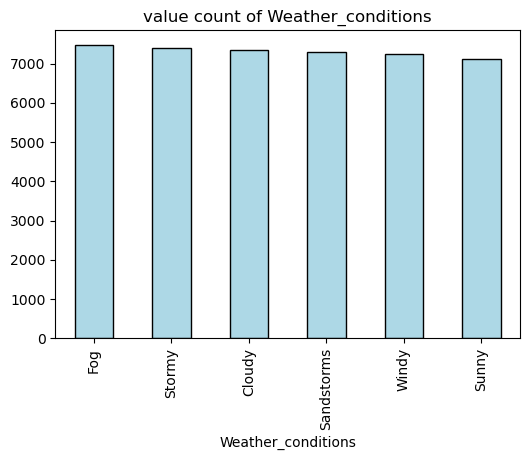

Road_traffic_density
High    4320.0
Name: count, dtype: float64 and percentage 9.851093425763345


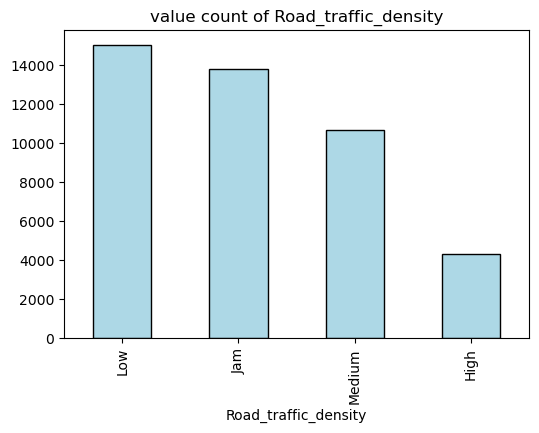

Type_of_order
Buffet    10853.0
Name: count, dtype: float64 and percentage 24.748591886529997


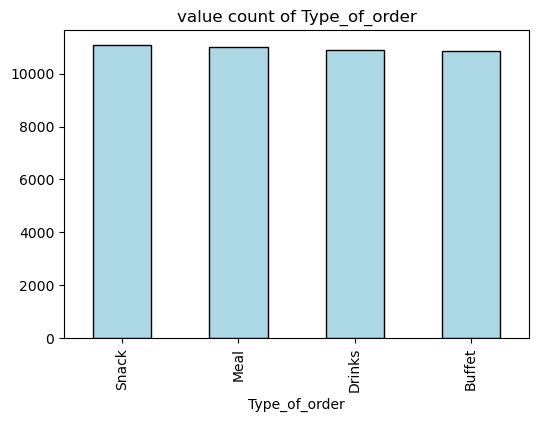

Type_of_vehicle
electric_scooter    3534.0
Name: count, dtype: float64 and percentage 8.058741705242515


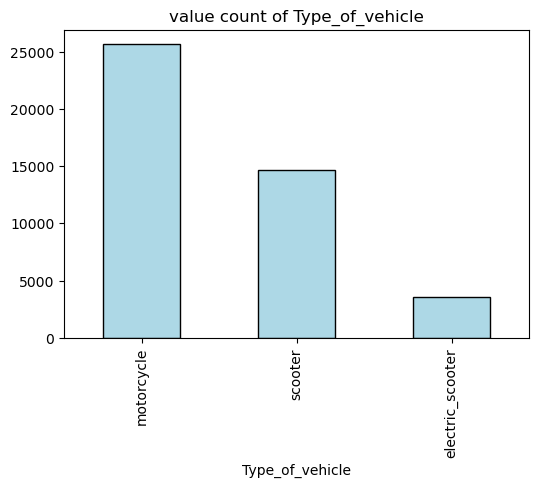

Festival
Yes    857.0
Name: count, dtype: float64 and percentage 1.9542562652498117


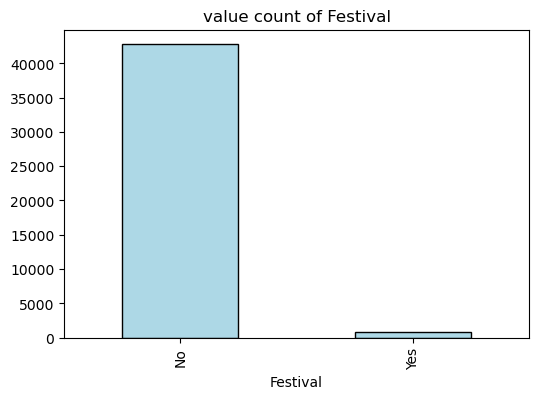

City
Semi-Urban    156.0
Name: count, dtype: float64 and percentage 0.35573392926367636


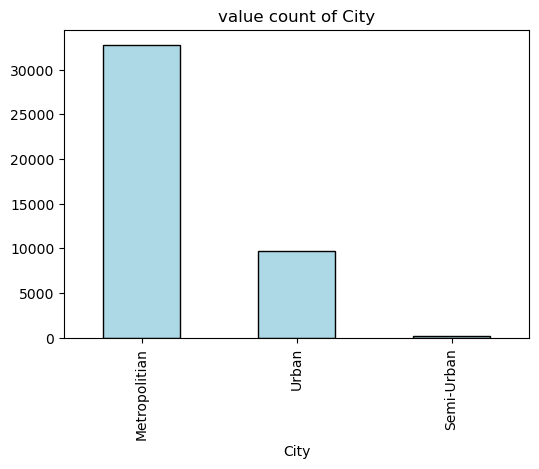

Delivery_City
BHP    665.0
Name: count, dtype: float64 and percentage 1.516429890771441


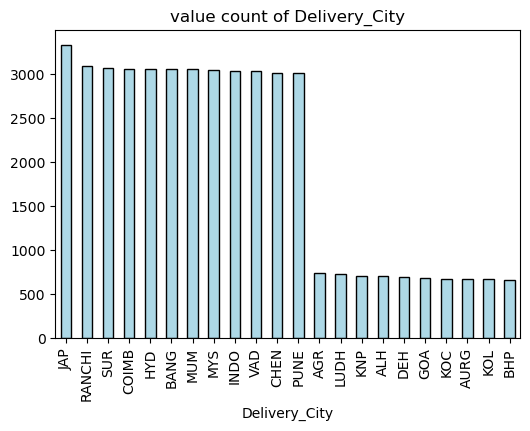

In [334]:
for col in cat_col:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f'value count of {col}')
    counts = df[col].value_counts()
    min = counts.where(counts == counts.min()).dropna()
    pen = (min.iloc[0]/df[col].shape[0])*100
    print(f'{min} and percentage {pen}')
    plt.show()

In [269]:
df[num_col].isnull().sum()

Delivery_person_Age        214
Delivery_person_Ratings      0
Vehicle_condition            0
multiple_deliveries        943
Time_taken (min)             0
year                         0
month                        0
date                         0
OrderTime_Hour               0
OrderTime_Min                0
Time_Order_picked_Hour       0
Time_Order_picked_Min        0
distance                     0
dtype: int64

has null values : 214 and % is : 0.4879939798873509


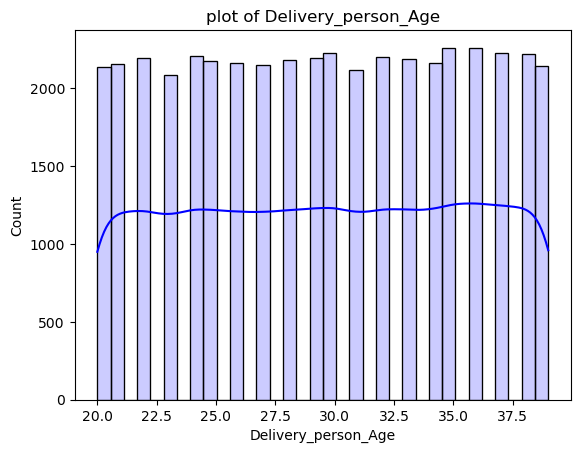

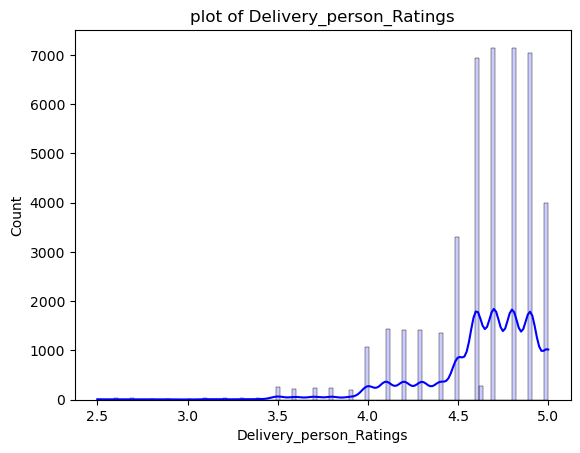

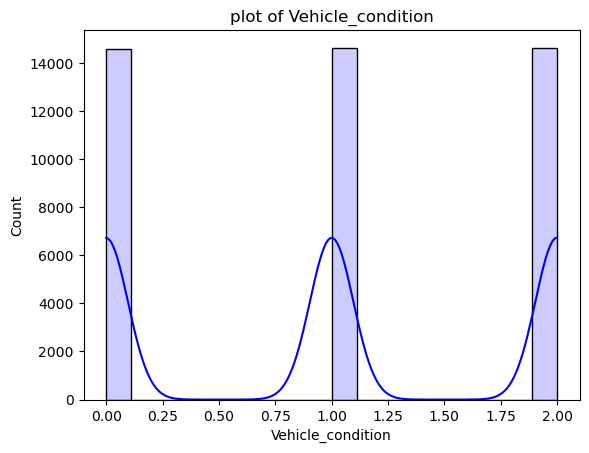

has null values : 943 and % is : 2.1503659954849157


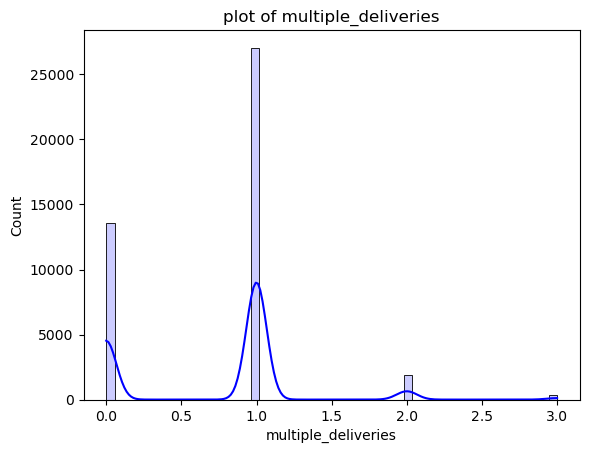

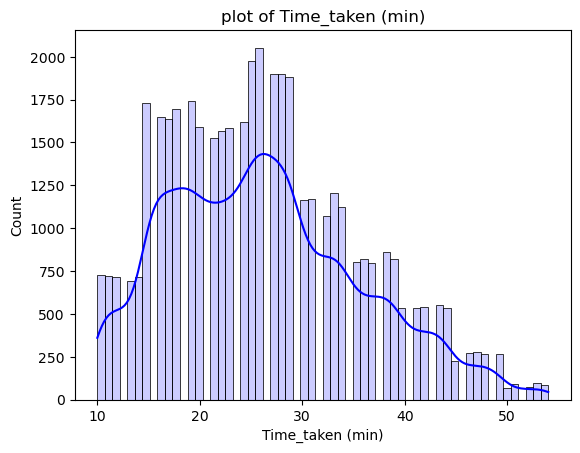

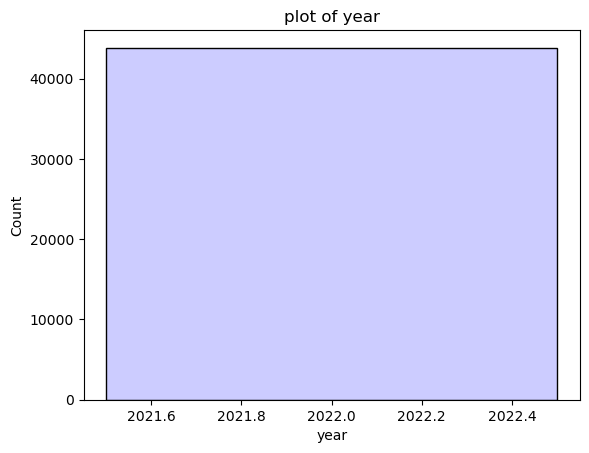

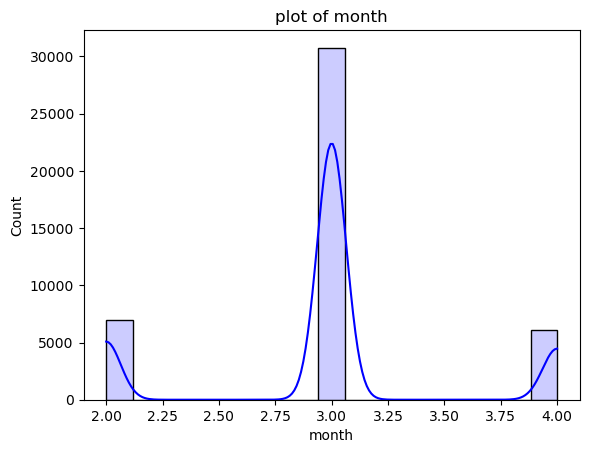

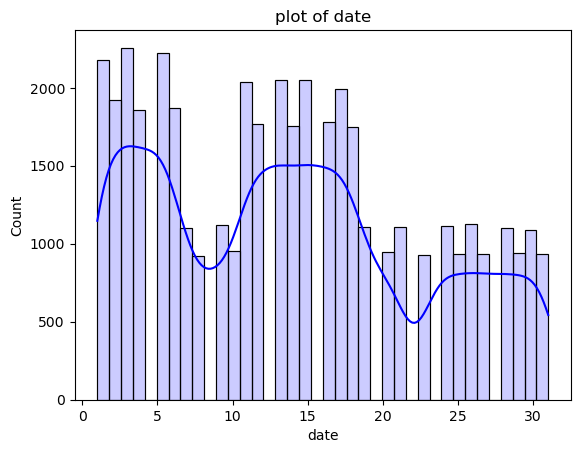

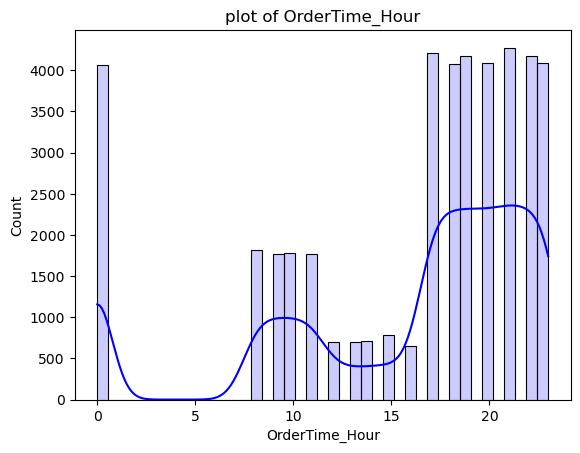

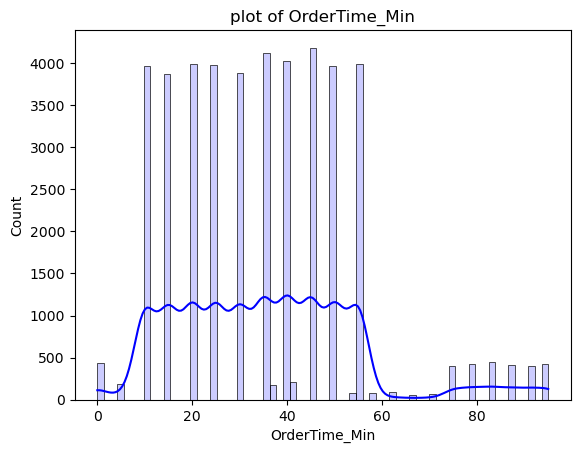

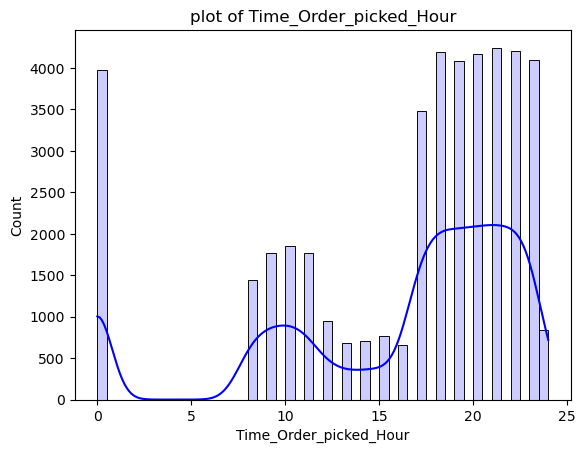

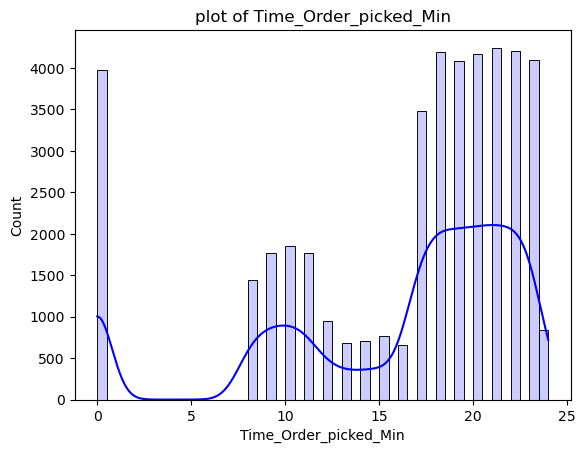

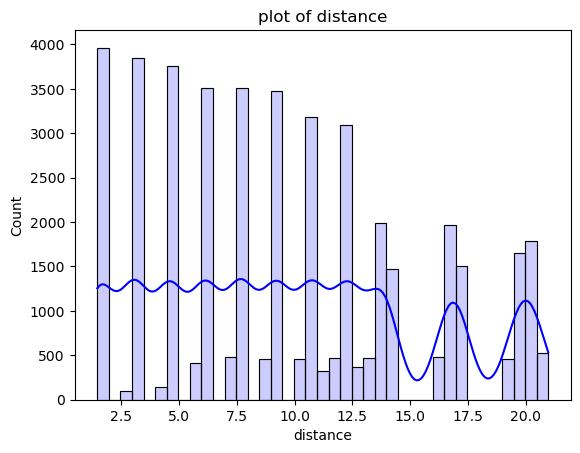

In [333]:
for col in num_col:
    sns.histplot(df[col], color='blue', edgecolor='black', kde=True, alpha=0.2)
    plt.title(f'plot of {col}')
    null_val = df[col].isnull().sum()
    if null_val > 0:
        print(f'has null values : {null_val} and % is : {(null_val/df[col].shape[0])*100}')
    plt.show()


In [370]:
np.random.seed(42)
x = np.random.uniform(0,1,size=1000)

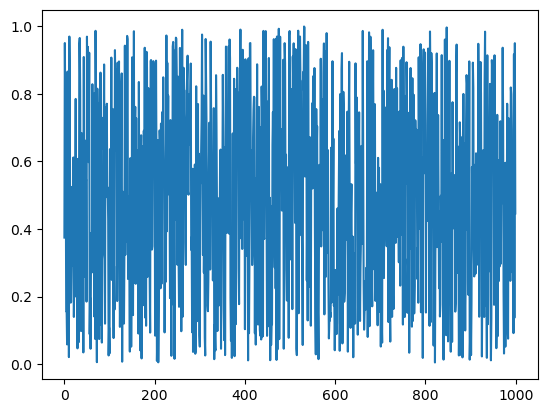

In [373]:
plt.plot(x)

In [382]:
np.histogram(x, bins=20)


(array([58, 56, 58, 54, 47, 48, 46, 56, 41, 40, 56, 55, 57, 41, 46, 42, 46,
        54, 53, 46]),
 array([0.00463202, 0.05438631, 0.10414059, 0.15389487, 0.20364915,
        0.25340344, 0.30315772, 0.352912  , 0.40266628, 0.45242057,
        0.50217485, 0.55192913, 0.60168341, 0.6514377 , 0.70119198,
        0.75094626, 0.80070054, 0.85045483, 0.90020911, 0.94996339,
        0.99971767]))

In [395]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


models = {

        'DecisionTreeRegressor' : DecisionTreeRegressor(),
        'GradientBoostingRegressor' : GradientBoostingRegressor(),
        'RandomForestRegressor' : RandomForestRegressor(),
        'SVR' : SVR()
    }

model_report = {
    'a' : 10,
    'b' : 25,
    'c' : 5
}

In [394]:
list(models.values())[0]

DecisionTreeRegressor()

In [429]:
high = max(model_report.values())

In [427]:
idx = list(model_report.values()).index(high)

In [430]:
name = list(model_report.keys())[idx]

In [431]:
model_report[name]

25